<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning/clase_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo en grupos

Primero SVM

Matriz de confusión:
[[17  0]
 [ 0 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



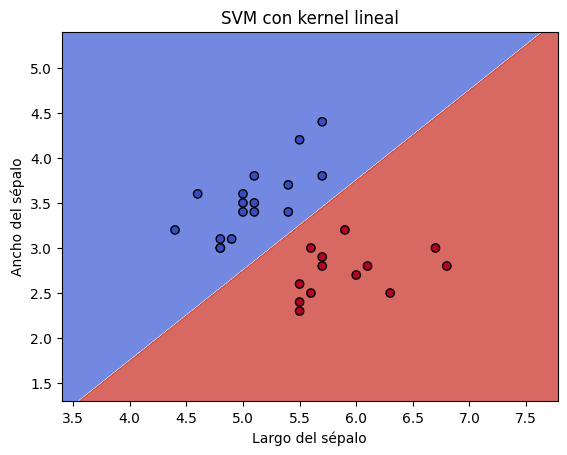

In [1]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Cargar dataset de ejemplo (dataset de flores Iris)
iris = datasets.load_iris()

# Solo usamos dos clases para simplificar el ejemplo (Setosa y Versicolor)
X = iris.data[:100, :2]  # Tomamos solo las dos primeras características
y = iris.target[:100]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear modelo SVM con kernel lineal
model = SVC(kernel='linear')

# Entrenar modelo
model.fit(X_train, y_train)

# Predecir en datos de prueba
y_pred = model.predict(X_test)

# Evaluar modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualización (solo si son 2D)
def plot_svm_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Largo del sépalo')
    plt.ylabel('Ancho del sépalo')
    plt.title('SVM con kernel lineal')
    plt.show()

# Solo si tienes numpy
import numpy as np
plot_svm_decision_boundary(model, X_test, y_test)


## Ejemplo SVM con dataset Iris (3 clases, visualización con PCA)


Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



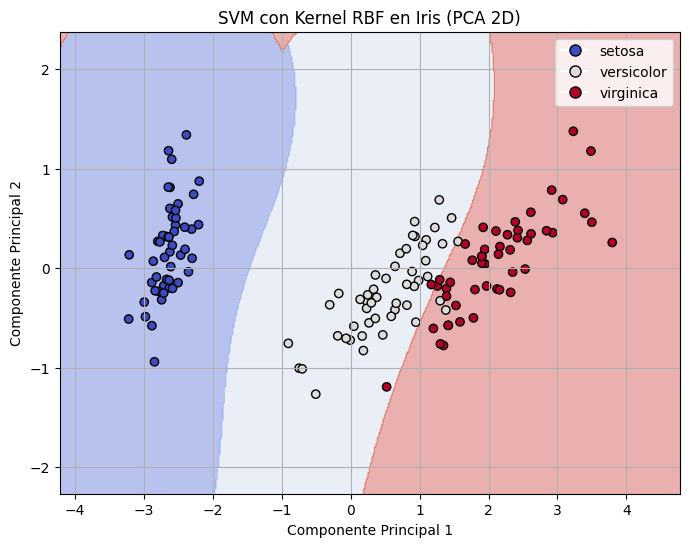

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Reducimos a 2 dimensiones para poder graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Separar en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Crear modelo SVM con kernel RBF (puede ser 'linear', 'poly', 'rbf', 'sigmoid')
model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualización de la frontera de decisión
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # paso de la grilla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Corrección aquí
    legend_labels = np.unique(y)
    handles = []
    for i, label in enumerate(legend_labels):
        handles.append(plt.Line2D([], [], marker='o', color='w',
                                  markerfacecolor=plt.cm.coolwarm(i / 2), label=target_names[label],
                                  markersize=8, markeredgecolor='k'))
    plt.legend(handles=handles)

    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.show()


plot_decision_boundary(model, X_pca, y, "SVM con Kernel RBF en Iris (PCA 2D)")
